In [2]:
#DS Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SKLearn Stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#helper
%matplotlib inline

data = pd.read_csv('Demographic_Data.csv')

In [3]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


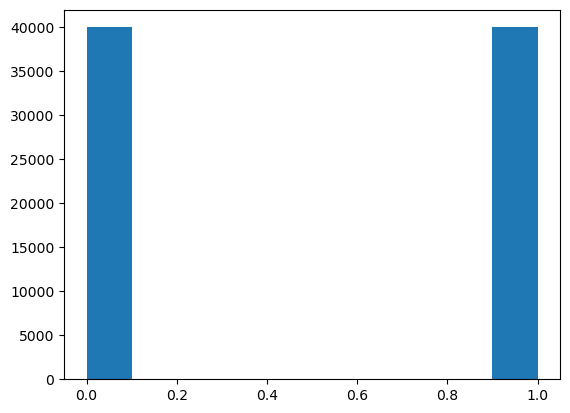

In [4]:
plt.hist(data['in-store']) 
plt.show()

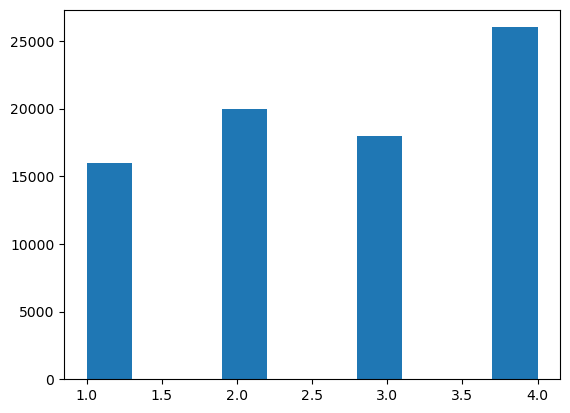

In [5]:
plt.hist(data['region']) 
plt.show()

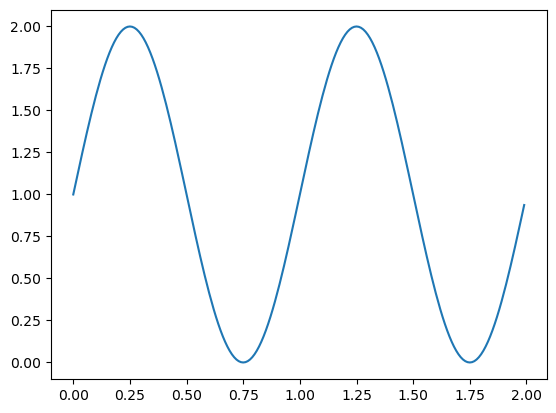

In [6]:


# dataRaw for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [7]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


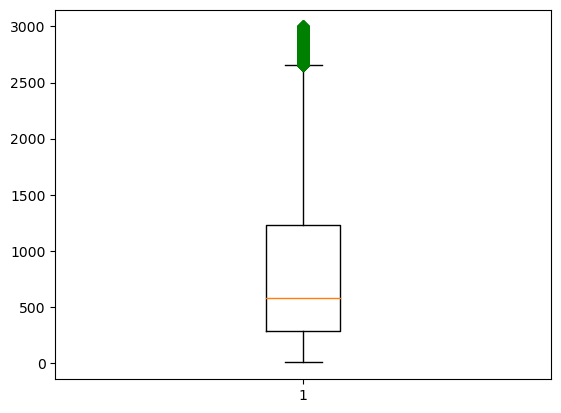

In [8]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

In [9]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


In [10]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


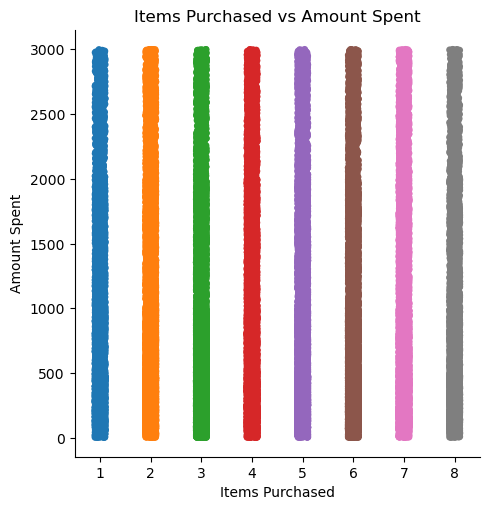

In [11]:
tempData = data

sns.catplot(data = data, x="items", y="amount")
plt.title("Items Purchased vs Amount Spent")
plt.xlabel("Items Purchased")
plt.ylabel("Amount Spent")
plt.show()

data = tempData

In [12]:
#These arrays will house each regions data



northArr = [] 
southArr = []
eastArr = []
westArr = []

#Loops through all of the data so we can split the region up seperately 
for reg in data.index:
   if data["region"][reg] == 1: #if its in the north
       northArr.append(data["amount"][reg])

   if data["region"][reg] == 2: #if its in the south
       southArr.append(data["amount"][reg])

   if data["region"][reg] == 3: #if its in the east
       eastArr.append(data["amount"][reg])

   if data["region"][reg] == 4: #if its in the west
       westArr.append(data["amount"][reg])

regArr = [northArr,southArr,eastArr,westArr]


#print(len(northArr))
#print(len(southArr))
#print(len(eastArr))
#print(len(westArr))
# print("North:")
#print(northArr) 

# print("South:")
# print(southArr)

# print("East:")
# print(eastArr)

# print("West:")
# print(westArr)




In [13]:
#Means for all regions
print("Means for the four regions are:")

northMean = np.mean(northArr)
southMean = np.mean(southArr)
eastMean = np.mean(eastArr)
westMean = np.mean(westArr)

print("North:", northMean)
print("South:", southMean)
print("East:", eastMean)
print("West:", westMean)



Means for the four regions are:
North: 745.1614908125
South: 252.10919617499997
East: 917.9696374444444
West: 1284.0520123076924


In [14]:
#Median for all regions

print("Medians for the four regions are:")

northMedian = np.median(northArr)
southMedian = np.median(southArr)
eastMedian = np.median(eastArr)
westMedian = np.median(westArr)


print("North:", northMedian)
print("South:", southMedian)
print("East:", eastMedian)
print("West:", westMedian)


Medians for the four regions are:
North: 662.92
South: 250.245
East: 697.825
West: 1230.5


In [15]:
#Standard Deviation for all regions

print("Standard Deviation for the four regions are:")

northSTD = np.std(northArr)
southSTD = np.std(southArr)
eastSTD = np.std(eastArr)
westSTD = np.std(westArr)


print("North:", northSTD)
print("South:", southSTD)
print("East:", eastSTD)
print("West:", westSTD)

Standard Deviation for the four regions are:
North: 493.1163701332104
South: 142.6598388785256
East: 751.389119294677
West: 756.1820380269056


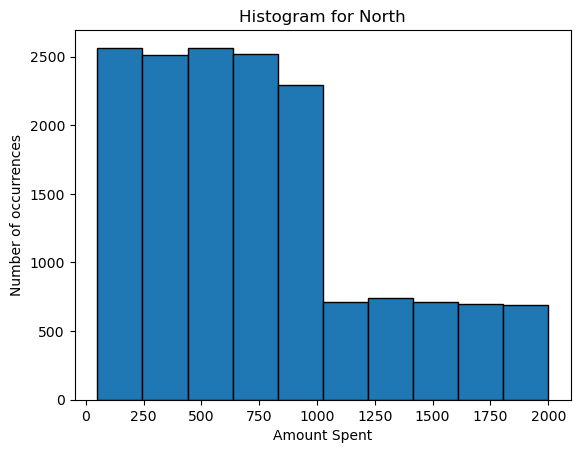

In [16]:
#Now We will see histogram for the North Region

#print("Histogram for North:")


plt.hist(northArr, ec= "k" )
plt.title("Histogram for North")
plt.xlabel("Amount Spent")
plt.ylabel("Number of occurrences")
plt.show()


Histogram for South:


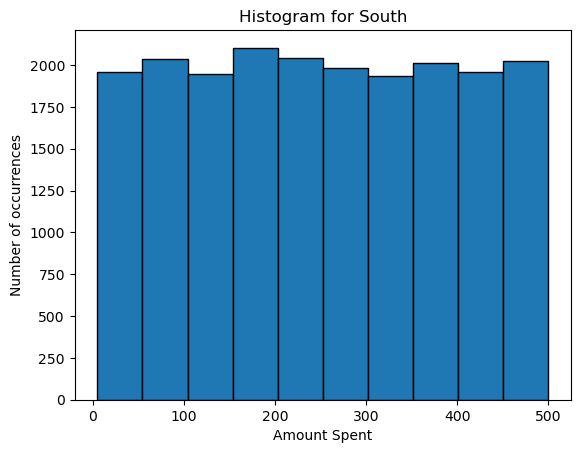

In [17]:
#Now We will see histogram for the South Region

print("Histogram for South:")

plt.hist(southArr, ec= "k" )
plt.title("Histogram for South")
plt.xlabel("Amount Spent")
plt.ylabel("Number of occurrences")
plt.show()

Histogram for East:


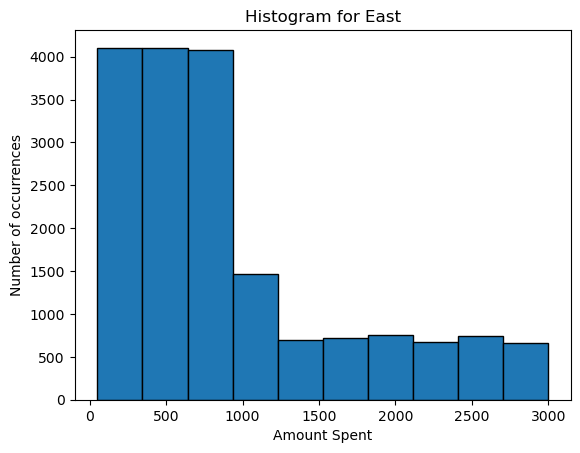

In [18]:
#Now We will see histogram for the East Region

print("Histogram for East:")

plt.hist(eastArr, ec= "k" )
plt.title("Histogram for East")
plt.xlabel("Amount Spent")
plt.ylabel("Number of occurrences")
plt.show()

Histogram for West:


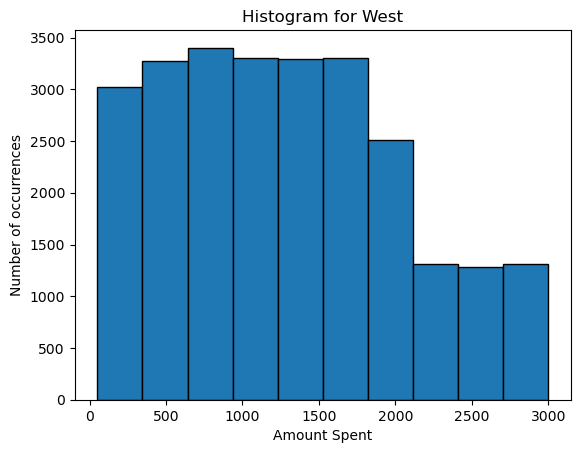

In [19]:
#Now We will see histogram for the West Region

print("Histogram for West:")

plt.hist(westArr, ec= "k" )
plt.title("Histogram for West")
plt.xlabel("Amount Spent")
plt.ylabel("Number of occurrences")

plt.show()

Blue = North
Orange = South
Green = East
Red = West


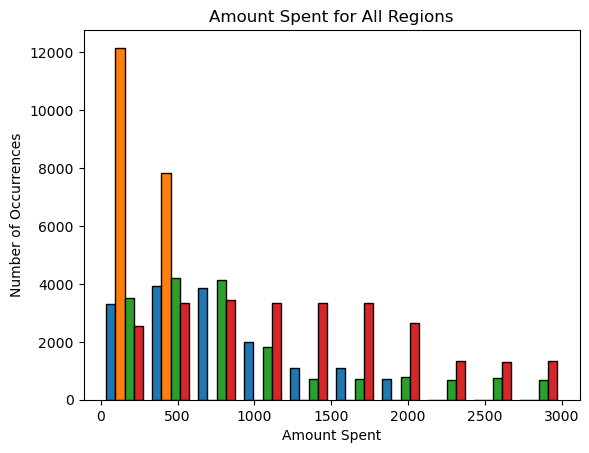

In [20]:
#Now we will combine the four histograms into one graph to compare easily

print("Blue = North\nOrange = South\nGreen = East\nRed = West")

plt.hist(regArr, ec= "k" )
plt.title("Amount Spent for All Regions")
plt.xlabel("Amount Spent")
plt.ylabel("Number of Occurrences")


plt.show()

1 = North
2 = South
3 = East
4 = West


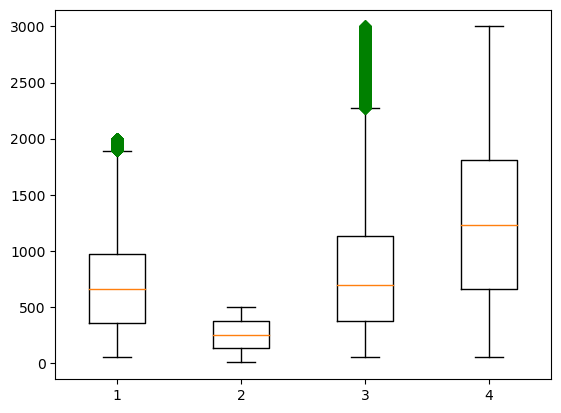

In [21]:

print("1 = North\n2 = South\n3 = East\n4 = West")

plt.boxplot(regArr,0,'gD')
plt.show()



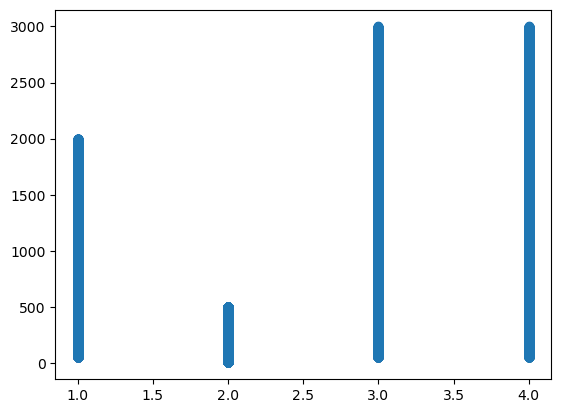

In [22]:
#This will show us a scatter plot for the regions


x = data['region']
y = data['amount']

plt.scatter(x,y, marker='o')
plt.show()


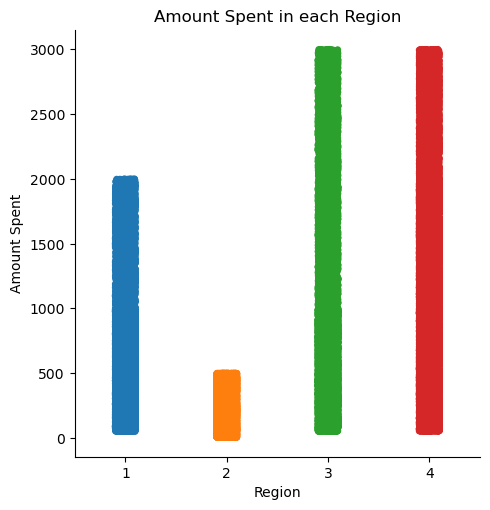

In [23]:
tempData = data

sns.catplot(data = data, x="region", y="amount")
plt.title("Amount Spent in each Region")
plt.xlabel("Region")
plt.ylabel("Amount Spent")
plt.show()

data = tempData

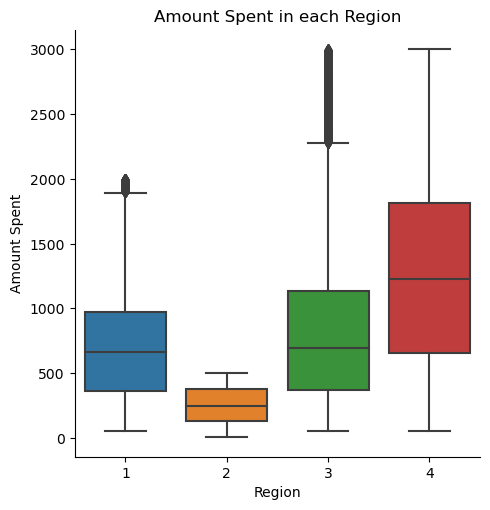

In [24]:
tempData = data

sns.catplot(data = data, x="region", y="amount", kind = "box")
plt.title("Amount Spent in each Region")
plt.xlabel("Region")
plt.ylabel("Amount Spent")
plt.show()

data = tempData

Are there differences in the age of customers between regions? 

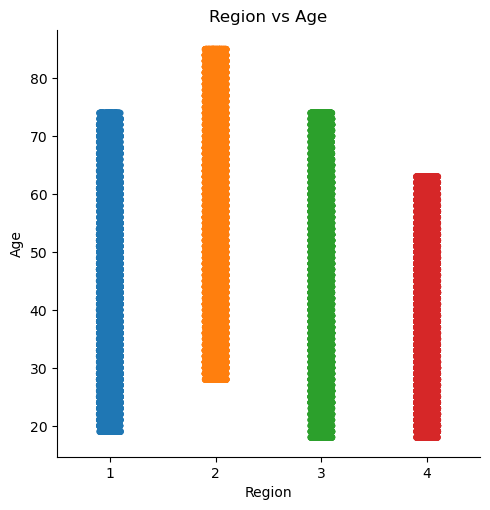

In [25]:
tempData = data

sns.catplot(data = data, x="region", y="age")
plt.title("Region vs Age")
plt.xlabel("Region")
plt.ylabel("Age")
plt.show()

data = tempData

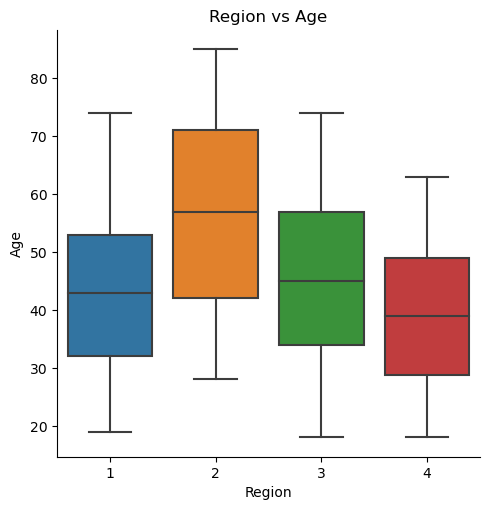

In [26]:
tempData = data

sns.catplot(data = data, x="region", y="age", kind = "box")
plt.title("Region vs Age")
plt.xlabel("Region")
plt.ylabel("Age")
plt.show()

data = tempData

Overall, it seems most regions are not that different in ages as have similair large range, but region 2 does seem to have oldest folks as its min max and mid are moderately higher than the rest regions

If so, can we predict the age of a customer in a region based on other demographic data?

In [27]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


First we will split our data into regions:

In [28]:
ageBucket = [1,9,19,29,39,49,59,69,79,89]



data["age_label"] = pd.cut(data["age"], ageBucket, labels = False)
data["amount_label"] = pd.qcut(data["amount"], q =[0,.0000001, .2, .4, .6, .8, 1], labels=False,precision=0)


#northDF.head()

In [29]:
data.head()

,in-store,age,items,amount,region,age_label,amount_label
0,0,37,4,281.03,2,3,2
1,0,35,2,219.51,2,3,1
2,1,45,3,1525.70,4,4,5
3,1,46,3,715.25,3,4,3
4,1,33,4,1937.50,1,3,5


In [30]:
#features

dataDep = data.drop(['age_label'], axis = 1)
dataDep = dataDep.drop(['age'], axis = 1)
dataDep = dataDep.drop(['amount'], axis = 1)

Y = data["age_label"]
X = dataDep


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 123)

#Modeling (Classification)
algoDTC = DecisionTreeClassifier()
modelDTC = algoDTC.fit(X_train,Y_train)

#Predictions
predDTC = modelDTC.predict(X_test)

print(classification_report(Y_test, predDTC))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       288
           2       0.24      0.23      0.23      3817
           3       0.23      0.35      0.27      5278
           4       0.24      0.23      0.23      5392
           5       0.20      0.18      0.19      4385
           6       0.17      0.11      0.13      2689
           7       0.17      0.15      0.16      1560
           8       0.00      0.00      0.00       591

    accuracy                           0.22     24000
   macro avg       0.16      0.16      0.15     24000
weighted avg       0.21      0.22      0.21     24000



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
modelDTC = DecisionTreeClassifier()
print(cross_val_score(modelDTC, X, Y, cv=5)) # cv = number of folds being held out

[0.214375  0.2155    0.219375  0.221875  0.2195625]


In [32]:

algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))


#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,Y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)


print("This is for when age is the dependant variable )")
for i in range(len(names)):
    print(names[i],results[i].mean())



This is for when age is the dependant variable )
Random Forest Classifier 0.21665003038058286
Decision Tree Classifier 0.2166875233492567


In [33]:

dataDep = data.drop(['age'], axis = 1)
dataDep = dataDep.drop(['amount'], axis = 1)
dataDep = dataDep.drop(["in-store"],axis=1)

Y = data["in-store"]
X = dataDep


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 123)

#Modeling (Classification)
algoDTC = DecisionTreeClassifier()
modelDTC = algoDTC.fit(X_train,Y_train)

#Predictions
predDTC = modelDTC.predict(X_test)

print(classification_report(Y_test, predDTC))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     11831
           1       0.83      0.88      0.85     12169

    accuracy                           0.85     24000
   macro avg       0.85      0.85      0.85     24000
weighted avg       0.85      0.85      0.85     24000



In [34]:
modelDTC = DecisionTreeClassifier()
print(cross_val_score(modelDTC, X, Y, cv=5)) # cv = number of folds being held out

[0.8476875 0.8433125 0.849625  0.8450625 0.844125 ]


In [35]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))


#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,Y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)


print("This is for when in-store is the dependant variabl)")
for i in range(len(names)):
    print(names[i],results[i].mean())

This is for when in-store is the dependant variabl)
Random Forest Classifier 0.8465749672953958
Decision Tree Classifier 0.8463999662015776


In [37]:
modelDTC = DecisionTreeClassifier(max_depth = 5)
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2500x2000 with 0 Axes>